In [94]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file = 'Medals.csv'
df_2024 = pd.read_csv(
    file,
    encoding='utf-8',
    encoding_errors='ignore'  # 忽略解码错误
)
df_2024 = df_2024[df_2024['Year']==2024]
df_2024 = df_2024.sort_values(by=['Total'], ascending=[False])
df_2024 = df_2024[['NOC','Total']].reset_index(drop=True)
print(df_2024)
file = 'pred_2028Medal_byMix.csv'
df_2028 = pd.read_csv(
    file,
    encoding='utf-8',
    encoding_errors='ignore'  # 忽略解码错误
)
df_2028 = df_2028[['NOC','Sum']]
df_2028 = df_2028[df_2028['NOC'].isin(df_2024['NOC'])].reset_index(drop=True)
print(df_2028)

    NOC  Total
0   USA    126
1   CHN     91
2   GBR     65
3   FRA     64
4   AUS     53
..  ...    ...
86  PAK      1
87  JOR      1
88  FIJ      1
89  CYP      1
90  ZAM      1

[91 rows x 2 columns]
    NOC    Sum
0   USA  127.0
1   FRA   86.0
2   CHN   83.0
3   AUS   71.0
4   JPN   64.0
..  ...    ...
86  PER    1.0
87  QAT    1.0
88  SGP    1.0
89  SVK    1.0
90  ZAM    1.0

[91 rows x 2 columns]


In [95]:
merged_df = pd.merge(df_2024, df_2028, on='NOC', how='left')

merged_df['Change'] = merged_df['Sum'] - merged_df['Total']
merged_df.columns = ['NOC','2024','2028','Change']

merged_df

,NOC,2024,2028,Change
0,USA,126,127.0,1.0
1,CHN,91,83.0,-8.0
2,GBR,65,49.0,-16.0
3,FRA,64,86.0,22.0
4,AUS,53,71.0,18.0
...,...,...,...,...
86,PAK,1,3.0,2.0
87,JOR,1,1.0,0.0
88,FIJ,1,3.0,2.0
89,CYP,1,1.0,0.0


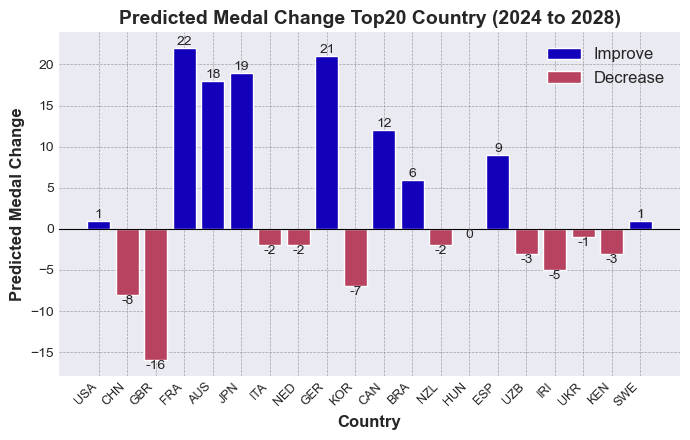

In [117]:
merged_df = merged_df.head(20) ## 只看前20名

plt.style.use('seaborn-v0_8-darkgrid')  # 使用 Matplotlib 提供的兼容样式

fig, ax = plt.subplots(figsize=(7, 4.5))

# 设置背景颜色为浅灰色
# ax.set_facecolor('#f0f0f0')

# 绘制正数和负数的柱状图
positive_bars = ax.bar(merged_df[merged_df['Change'] >= 0].index, merged_df[merged_df['Change'] >= 0]['Change'], 
                       color='#1200BA', label='Improve', edgecolor='white')
negative_bars = ax.bar(merged_df[merged_df['Change'] < 0].index, merged_df[merged_df['Change'] < 0]['Change'], 
                       color='#B74360', label='Decrease', edgecolor='white')
# positive_bars = ax.bar(merged_df[merged_df['Change'] >= 0].index, merged_df[merged_df['Change'] >= 0]['Change'], 
#                        color='#84E6C9', label='Improve', edgecolor='white')
# negative_bars = ax.bar(merged_df[merged_df['Change'] < 0].index, merged_df[merged_df['Change'] < 0]['Change'], 
#                        color='#EEA6D1', label='Decrease', edgecolor='white')

# 添加图例
ax.legend(fontsize=12) 

# 添加标题和标签
ax.set_title('Predicted Medal Change Top20 Country (2024 to 2028)', fontsize=14, fontweight='bold')
ax.set_xlabel('Country', fontsize=12, fontweight='bold')
ax.set_ylabel('Predicted Medal Change', fontsize=12, fontweight='bold')

# 在值为0处添加一条水平线
ax.axhline(0, color='black', linewidth=0.8)

# 设置横坐标标签斜着显示
ax.set_xticks(range(len(merged_df)))
ax.set_xticklabels(merged_df['NOC'], rotation=45, ha='right', fontsize=9)

# 在每条柱上标注数值
for bar in positive_bars + negative_bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom' if yval > 0 else 'top')

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
# 调整布局以避免标签被截断
plt.tight_layout()

plt.savefig("fig/Pred_Medal_Change.png")
# 显示图表
plt.show()

In [121]:
no_medal = pd.read_csv(
    'NoMedal_Country.csv',
    encoding='utf-8',
    encoding_errors='ignore'  # 忽略解码错误
)
no_medal

,Unnamed: 0,NOC
0,2,AIN
1,5,AND
2,6,ANG
3,7,ANT
4,11,ARU
...,...,...
76,228,STP
77,229,SWZ
78,230,TLS
79,231,VIN


In [139]:
df_2028 = pd.read_csv(
    'pred_2028Medal_byGB.csv',
    encoding='utf-8',
    encoding_errors='ignore'  # 忽略解码错误
)
df_2028 = df_2028[['NOC','Total']]
df = df_2028[df_2028['NOC'].isin(no_medal['NOC'])]
df = df[df['Total']>0]
df.to_csv("No_medal_pred.csv")